## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [1]:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, Eq 
import sympy
# Продолжим использовать магию
%matplotlib inline

### Задание 1
Решить уравнение $6x^4 + 9x^3 - 99x^2 - 66x + 360 = 0$ с помощью solve и solveset.

In [2]:
x = Symbol('x')
expr_1 = 6*x**4 + 9*x**3 - 99*x**2 - 66*x + 360

print("Solutions via solve():")
display(solve(expr_1, x))
print("Solutions via solveset():")
display(solveset(expr_1, x))

Solutions via solve():


[-4, -5/2, 2, 3]

Solutions via solveset():


{-4, -5/2, 2, 3}

### Задание 2.
Найти только вещественные решения уравнения $12x^8 + 32x^6 + 21x^4 - 2x^2 - 3 = 0$.

In [3]:
x = Symbol('x')
expr_2 = 12*x**8 + 32*x**6 + 21*x**4 - 2*x**2 - 3
print("Real solutions of the equation:")
display(solveset(expr_2, x, domain=S.Reals))

Real solutions of the equation:


{-sqrt(3)/3, sqrt(3)/3}

### Задание 3.
Решить уравнение $\log_2(\sin(x))=-1$. 

In [4]:
x = Symbol('x')
expr_3 = sympy.log(sympy.sin(x), 2) + 1
print("Solutions of the equation:")
display(solveset(expr_3, x))

Solutions of the equation:


Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/6), Integers))

### Задание 4.
Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале  $(-5\pi/4, 11\pi/4)$. 

In [5]:
x = Symbol('x')
expr_4 = 2*sympy.tan(x)** 2 - 3*sympy.tan(x) - 5
interval = Interval.open(-5*sympy.pi/4, 11*sympy.pi/4)

print(f"Soltions of the equation in the open interval ({interval.left}; {interval.right}):")
display(Intersection(solveset(expr_4, x), interval))


Soltions of the equation in the open interval (-5*pi/4; 11*pi/4):


{-pi/4, 3*pi/4, 7*pi/4, -pi + atan(5/2), atan(5/2) + pi, atan(5/2) + 2*pi, atan(5/2)}

### Задание 5.
Найти область определения функции $\sqrt{\sin^2 x - 1}$.

In [17]:
from sympy.calculus.util import function_range

x, y = symbols("x y", domain=S.Reals)
f =  sympy.sqrt(sympy.sin(x) * sympy.sin(x) - 1)

# solve (sin(x) * sin(x) - 1) ^ 0.5 - y = 0
solutions_3 = Union(*sympy.FiniteSet({*solve(f - y, x)}))
# display(*solutions_3)

# function_range(x(y))
d_x_y = sympy.FiniteSet(*{function_range(func, y, domain=S.Reals) for func in solutions_3})
display(*d_x_y)


Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers))

### Задание 6.
Найти решение уравнения $\frac{(x^3 + 5 x^2 - 3 x - 15)\ln(x^2 - 3)}{x^2 - 3 x + 2} = 0$. Выполнить проверку подстановкой subs.
#### Указание.
Решение нужно разбить на части. Нужно учесть область определения выражения в левой части уравнения.

In [7]:
x = Symbol('x')
expr_6 = (x**3 + 5*x**2 - 3*x - 15) * sympy.ln(x**2 - 3) / (x**2 - 3*x + 2)

# We can just write:
# solveset(expr_6, x))

print("Solutions of the equation:")
for solution in solve(expr_6, x):
    if expr_6.subs(x, solution) == S(0):
        display(solution)

Solutions of the equation:


-5

-2

### Индивидуальное задание.
Через все точки пересечения графиков функций $f(x)$ и $g(x)$ провести горизонтальные прямые. Изобразить на графике $f(x)$ зеленым цветом, $g(x)$ красным, горизонтальные линии черным. 
Формулы для $f(x)$ и $g(x)$ включить в легенду.

#### var. 50
$f(x) = \frac{x^2}{8} + x - 2 \\$
$g(x) = \frac{3x^2}{8} + x − 6$


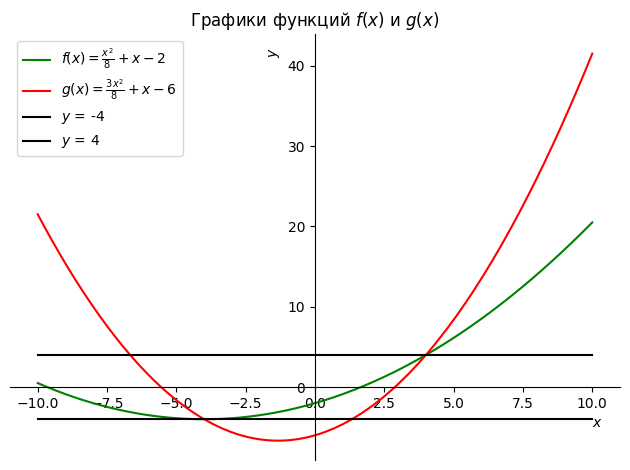

In [8]:
x = symbols('x', domain=S.Reals)
f = x**2/8 + x - 2
g = 3*x**2/8 + x - 6
functs_params = (
    (f, r"$f(x) = \frac{x^2}{8} + x - 2$", "green"),
    (g, r"$g(x) = \frac{3x^2}{8} + x − 6$", "red")
)

# Init plot.
title = "Графики функций $f(x)$ и $g(x)$"
x_interval = (x, -16, 16)
x_label_align = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align = "\t\t\t\t\t\t\t\t\t\t\t"
p = sympy.plot(
    interval=x_interval,
    title=title,
    xlabel=x_label_align + "$x$",
    ylabel=y_label_align + "$y$",
    legend=True,
    show=False
)

# Add functions to the plot.
for func, label, color in functs_params:
    p.append(sympy.plot(
        func,
        label=label,
        legend=True,
        line_color=color,
        show=False
    )[0])

# Points of intersection f(x) = g(x).
x_points = solve(f - g, x, domain=S.Reals)
y_points = [f.subs(x, x_value) for x_value in x_points]
#Add lines to the plot.
for y_point in y_points:
    p.append(sympy.plot(
        y_point,
        label=f"$y$ = {y_point}",
        line_color="black",
        show=False
    )[0])

p.show()